### Mie First
Mie theory provides a route to the exact solution to Maxwell's equations for light interacting with a spherical object; this is done by expanding the incident and scattered
light waves in a basis of multi-polar functions; hence one usually speaks about the dipolar contribution to scattering, the quadrupolar contribution, the octupolar, and so on.  For very large particles, many orders of this expansion may be needed, but for small particles the scattering and absorption is dominated by the dipolar contribution.  Hence, for spherical nanoparticles that are less than or equal to about 10 nm in diameter, the Mie theory expansion is truncated after only the first term.  As a concrete example, the Mie theory expression for the absorption of a small spherical nanoparticle is as follows:

\begin{equation}
\sigma_{abs}(\lambda) = \frac{2 \pi}{\lambda} {\rm Im}\left( \alpha(\lambda) \right),
\end{equation}
where $\alpha(\lambda)$ is the dipole polarizability given by
\begin{equation}
\alpha(\lambda) = 4 \pi r^3 \left( \frac{\epsilon_p(\lambda) - \epsilon_s}{\epsilon_p(\lambda) + 2\epsilon_s} \right)
\end{equation}
where $r$ is the radius of the particle, $\epsilon_p(\lambda)$ denotes the wavelength-dependent dielectric function of the material the particle is made from, $\epsilon_s$ denotes the dielectric function of the surroundings (or solvent) that the particle is immersed in, and ${\rm Im}$ means we will only take the imaginary part of the quotient (the dielectric function of the particle will typically be complex; if it is not, there will be no absorption).

We can use WPTherml to get the refractive index of materials as a function of wavelength, which is equivalent to the dielectric function as a function of wavelength by
\begin{equation}
\epsilon_p(\lambda) = n_p(\lambda)^2,
\end{equation}
where $n_p(\lambda)$ is the refractive index of the particle. 


 Temperature not specified!
 Proceeding with default T = 300 K


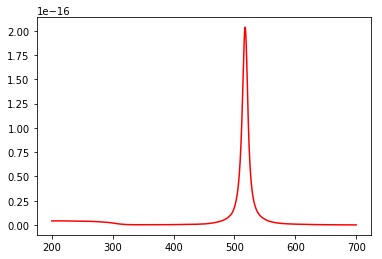

In [5]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
import numpy as np

structure = {

        'Material_List': ['Air', 'Ag', 'Air'],
        'Thickness_List': [0,  200e-9, 0],
        'Lambda_List': [200e-9, 700e-9, 2000],
     
        }

### create the silver object - call it sphere for no particular reason
sphere = multilayer(structure)
### get the refractive index of Ag (since it is layer 1 based on the structure above)
n_Ag = sphere.layer_ri(1)
### get the dielectric function of Ag
eps_Ag = n_Ag * n_Ag

'''Lets compute the Mie theory absorption of a 3 nm Ag particle in water, which 
   has refractive index = 1.33, here!'''
r = ### fill in radius here, use meters!
eps_s =  ### fill in dielectric function of water here!
quotient = ### compute the quotient whose Imaginary part you need from Mie theory expression here
pre = ### compute pre-factor that depends on wavelength and radius here!
sigma_abs = ### compute full absorption spectrum here!

plt.plot(sphere.lambda_array*1e9, sigma_abs, 'red')
plt.show()

Mie theory provides a classical electrodynamics treatment of the absorption of light by matter; of course we can use quantum mechanics to simulate the absorption of light, as well.  In analogy to our previous Mie theory treatment, we can assume that the interaction between our quantum system and light is dominated by dipolar interactions.  In this view, the absorption of light occurs under the following conditions:
(a) the energy associated with the absorbed light matches the energy difference between two energy eigenstates (call the intial energy eigenstate $\psi_i$ and the final energy eigenstate $\psi_f$, note that $E_i$ need not be less than $E_f$).
(b) there is a charge displacement associated with the transition from $\psi_i$ to $\psi_f$; this gives rise to a *transition dipole moment* that is quantified by the expectation value
\begin{equation}
\mu_{if} = \langle \psi_i | \hat{\mu} | \psi_f \rangle,
\end{equation}
where $\hat{\mu}$ is the transition dipole operator, given by $q {\bf r}$ where
$q$ is the charge (for a molecular transition, this would be a single electron charge) and 
${\bf r}$ is the position operator for charged matter.  A bit of dimensional analysis reveals
that the electric field (which has dimensions of electric potential over length) dotted into the dipole operator (which has dimensions of charge times length) has overal dimensions of energy, so we can think of the interaction of a time-varying electric field with the transition dipole moment of a quantum system as a time-varying potential term in its Hamiltonian.  This leads to the typical "light-matter" contribution to Hamiltonians:
\begin{equation}
\hat{H}(t) = \hat{H}_0 - {\bf E}(t) \cdot \hat{\mu},
\end{equation}
where $\hat{H}_0$ is the Hamiltonian for your quantum system in the absence of the time-varying electric field (i.e. in the dark).

### Who's in Liouville now
We can see what impact light has on our quantum system by evolving the quantum state under the influence of the potential exerted by the light.  We can do this either by solving the time-dependent Schr\"odinger equation, or the analog of the time-dependent Schr\"odinger equation for the density matrix, which is called the Liouville equation.

Here we will use the Liouville equation because it permits a simple modification that allows us to model spontaneous emission of absorbed light, and this effect will lead to the appropriate linewidth of the absorption spectrum we will simulate.  Some of you may recall the
Liouville equation has the form
\begin{equation}
\frac{d}{dt} {\bf D} = \frac{-i}{\hbar} [{\bf H},{\bf D}],
\end{equation}
where $[{\bf H},{\bf D}] = {\bf H}{\bf D}-{\bf D}{\bf H}$ is known as a commutator of the Hamiltonian and Density matrices.  

We can consider modeling a system 

